In [ ]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Load in data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train.shape:", x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
# The data is only 2D
# Convolution expects Height x Width x Color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
# number of classes
K = len(set(y_train))
print("Number of class:", K)


Number of class: 10


In [ ]:
# Build the model using functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)
model = Model(i, x)

In [ ]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5358 - accuracy: 0.8034 - val_loss: 0.4280 - val_accuracy: 0.8361
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3802 - accuracy: 0.8574 - val_loss: 0.3678 - val_accuracy: 0.8646
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3314 - accuracy: 0.8761 - val_loss: 0.3430 - val_accuracy: 0.8786
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2994 - accuracy: 0.8878 - val_loss: 0.3136 - val_accuracy: 0.8896
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.8975 - val_loss: 0.3080 - val_accuracy: 0.8886
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2539 - accuracy: 0.9048 - val_loss: 0.2967 - val_accuracy: 0.8940
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2335 - accuracy: 0.9124 - val_loss: 0.3175 - val_accuracy:

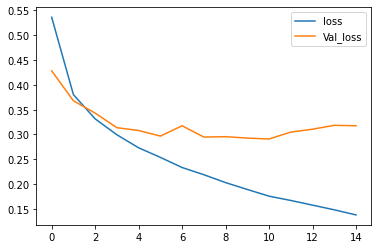

In [ ]:
# plot loss per iteration
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "Val_loss")
plt.legend()


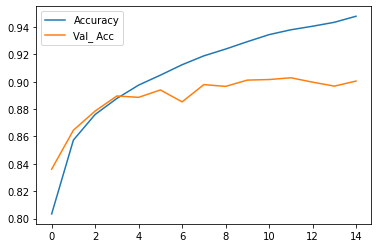

In [ ]:
# Plot accuracy per interation
plt.plot(r.history["accuracy"], label = "Accuracy")
plt.plot(r.history["val_accuracy"], label = "Val_ Acc")
plt.legend()

Confusion matrix, without normalization
[[792   2  26   8   4   2 163   0   3   0]
 [  1 978   1  11   5   0   3   0   1   0]
 [ 14   0 885  10  40   0  49   0   2   0]
 [  6  10  23 902  24   0  35   0   0   0]
 [  0   0  67  30 809   0  94   0   0   0]
 [  1   0   0   0   0 968   1  18   1  11]
 [ 61   0  65  22  74   0 771   0   7   0]
 [  0   0   0   0   0  10   0 958   0  32]
 [  1   2   5   3   4   1   9   4 971   0]
 [  1   0   0   0   0   4   0  24   0 971]]


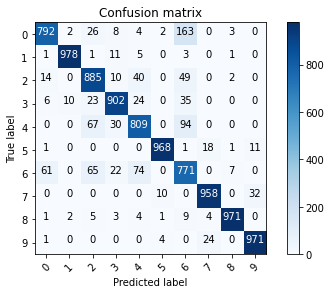

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [ ]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

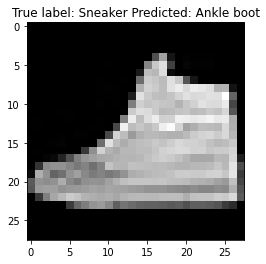

In [ ]:
# Show some missclassified examples
missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));